In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../utils')
import handle_db as hdb
import config as config

In [59]:
the_symbol = 'BCN'
print(config.COLUMN_NAMES)
the_file = f'/home/pablo/MEGA/SEGURO_DE_DATOS/datos/old_database/{the_symbol}_todo.dat'

['time_re', 'price_usd', 'volume_usd', 'price_btc', 'volume_btc', 'time_lu']


In [60]:
df1 = pd.read_csv(the_file,  
                 names = ['time_re', 'price_usd', 'price_btc', 'volume_usd', 'volume_btc'], 
                 dtype = {'time_re':np.float64, 'price_usd':np.float64, 'price_btc':np.float64, 'volume_usd':np.float64, 'volume_btc':np.float64},
                 usecols=[0, 1, 2, 3, 4], 
                 delim_whitespace = True)
df = df.dropna()
df.head(10)

,time_re,price_usd,price_btc,volume_usd,volume_btc
0,434791.672292,0.000590,5.004666e-08,58226.0,4.939849
1,434791.762916,0.000589,4.996439e-08,57861.0,4.905969
2,434791.850908,0.000590,4.990194e-08,58039.0,4.906086
3,434791.941896,0.000591,4.989622e-08,57927.0,4.887530
4,434792.035596,0.000592,4.983662e-08,57978.0,4.882769
5,434792.124672,0.000594,4.988835e-08,51961.0,4.362072
6,434792.212412,0.000596,4.992628e-08,51786.0,4.338276
7,434792.303000,0.000531,4.462185e-08,45627.0,3.834202
8,434792.391571,0.000531,4.456598e-08,45595.0,3.827653
9,434792.479492,0.000530,4.456463e-08,45377.0,3.813834


In [58]:
df2.head()

,time_re,price_usd,price_btc,volume_usd,volume_btc
0,434791.672292,0.000590,5.004666e-08,58226.0,4.939849
1,434791.762916,0.000589,4.996439e-08,57861.0,4.905969
2,434791.850908,0.000590,4.990194e-08,58039.0,4.906086
3,434791.941896,0.000591,4.989622e-08,57927.0,4.887530
4,434792.035596,0.000592,4.983662e-08,57978.0,4.882769


In [61]:
df1.head()

,time_re,price_usd,price_btc,volume_usd,volume_btc
0,425000.484167,0.002736,4.400000e-07,5936200.0,954.248723
1,425000.650833,0.002741,4.400000e-07,5941300.0,954.345982
2,425000.734444,0.002745,4.400000e-07,5947850.0,954.977795
3,425000.817778,0.002747,4.400000e-07,5949080.0,954.511688
4,425000.900833,0.002744,4.400000e-07,5494560.0,881.606562


In [70]:
df = pd.concat([df1,df2], ignore_index=True).dropna()
df.head()

,time_re,price_usd,price_btc,volume_usd,volume_btc
0,425000.484167,0.002736,4.400000e-07,5936200.0,954.248723
1,425000.650833,0.002741,4.400000e-07,5941300.0,954.345982
2,425000.734444,0.002745,4.400000e-07,5947850.0,954.977795
3,425000.817778,0.002747,4.400000e-07,5949080.0,954.511688
4,425000.900833,0.002744,4.400000e-07,5494560.0,881.606562


In [71]:
df['time_re'] = df['time_re'].apply(lambda x : int(round(x*3600,0)))
df['time_lu'] = df['time_re']
df = df.drop_duplicates(subset="time_re", keep="last")
df = df.sort_values(["time_re"])
#df = df.reset_index()
df = df[config.COLUMN_NAMES]
df.tail()

,time_re,price_usd,volume_usd,price_btc,volume_btc,time_lu
90321,1581025253,0.000369,18863.44,3.786768e-08,1.937966,1581025253
90322,1581025578,0.000369,18951.71,3.789370e-08,1.947526,1581025578
90323,1581025900,0.000369,18764.33,3.783158e-08,1.924953,1581025900
90324,1581026219,0.000299,15271.55,3.066501e-08,1.567224,1581026219
90325,1581026545,0.000299,15760.41,3.072105e-08,1.617263,1581026545


(90125, 6)


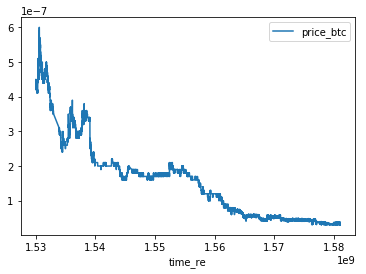

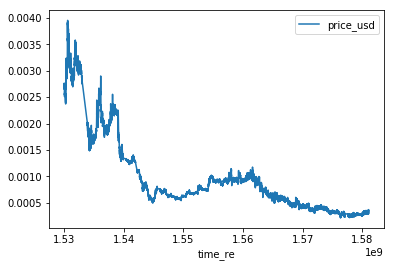

In [72]:
print(df.shape)
df.plot('time_re', 'price_btc')
df.plot('time_re', 'price_usd')

In [ ]:
df[df['price_btc'] == df['price_btc'].max()]

In [73]:
cnx = hdb.start_mysql_connection(config.DATABASES['old_data'])
cursor = cnx.cursor(buffered=True)

In [74]:
hdb.create_table(cursor, cnx, the_symbol)


True

In [75]:
df.to_csv("temp.csv", header=False, index=False, sep='\t')

In [ ]:
for index, row in df.iterrows():
    hdb.write_a_line(cursor, cnx, the_symbol, row.to_dict())